In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt

This example is designed to simulate discontinuous warm permafrost with a flux (-1e-07) at the bottom boundary. 
test0 is similar to the 1Dcolumn.  

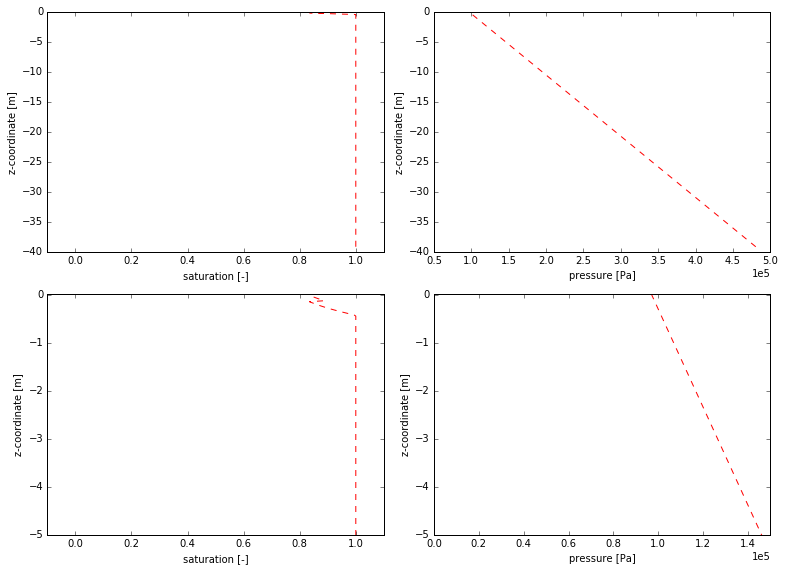

In [2]:
def plot(directory, axs, style):
    dati = column_data.column_data(["pressure", "saturation_liquid"],
                              keys=1, directory=directory)
    z = dati[0,0,:]

    axs[0,1].plot(dati[1,0,:],z, style)
    axs[0,0].plot(dati[2,0,:],z, style)

    # zoom in
    axs[1,1].plot(dati[1,0,:],z, style)
    axs[1,0].plot(dati[2,0,:],z, style)

fig, axs = plt.subplots(2,2, figsize=(11,8))
dii = "test0/test0-organic.regression.gold"
plot(dii, axs, 'r--')

axs[0,0].set_xlim([-.1,1.1])
axs[0,0].set_xlabel('saturation [-]')
axs[0,0].set_ylabel('z-coordinate [m]')
axs[0,1].set_xlabel('pressure [Pa]')
axs[0,1].set_ylabel('z-coordinate [m]')
axs[0,1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

axs[1,0].set_ylim([-5,0])
axs[1,1].set_ylim([-5,0])
axs[1,0].set_xlim([-.1,1.1])
axs[1,1].set_xlim([0.5,1.5e5])
axs[1,0].set_xlabel('saturation [-]')
axs[1,0].set_ylabel('z-coordinate [m]')
axs[1,1].set_xlabel('pressure [Pa]')
axs[1,1].set_ylabel('z-coordinate [m]')
axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

#### test2: Freeze steady-state to generate ice column

Transient simulations are initialized in the winter to make spinup simpler.  Here we start with temperature of 271.15K = -2C at the top and flux at the bottom boundary.  

In this case the lower boundary stays unfrozen and gas does not accumulates there. 

The overall temprature profile with depth changes now from -2C at top to -2.5C at the bottom boundary.

NOTE: From here on, transient problems are plotted such that early times have low saturation, and late times are high saturation.

In [5]:
# plot the solution

def plot(directory, axs, style):
    # load the data
    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=directory)
    keys, times, dat = parse_xmf.readATS(directory=directory)

    ice = colors.cm_mapper(-10000, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10000, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10000, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = dati[0,0,:]
    for i,t in enumerate(times):
        axs[2].plot(dati[5,i,:]- 273.15,z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t)) #dark blue
        axs[0].plot(dati[3,i,:],z, style, color=ice(t)) #light blue
        axs[0].plot(dati[4,i,:],z, style, color=gas(t)) #dark red
    axs[2].plot(dati[5,i,:]*0,z, style, color=gas(t))
    
def plot_resutls(diii):      
    fig, axs = column_data.getFigs(False, True)
    plot(diii, axs, '-')

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [C]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    # and the zoomed version
    fig, axs = column_data.getFigs(False, True)

    plot(diii, axs, '-')

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    axs[0].set_ylim([-2.5,-0])
    axs[1].set_ylim([-2.5,-0])
    axs[2].set_ylim([-2.5,-0])

    plt.show()

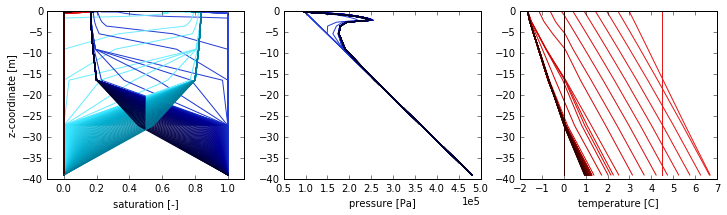

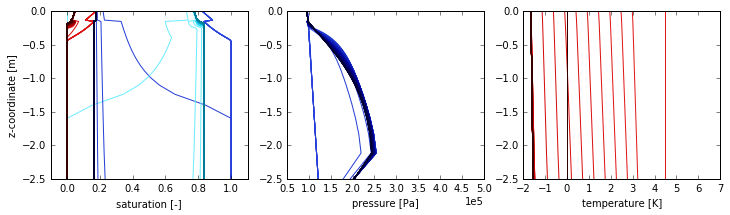

In [4]:
plot_resutls("test2/test2-organic.regression.gold")

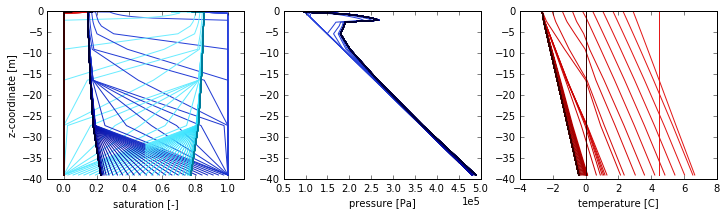

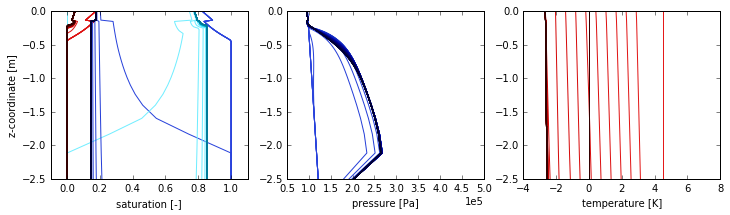

In [6]:
plot_resutls("test2/test2-organic.regression.gold")

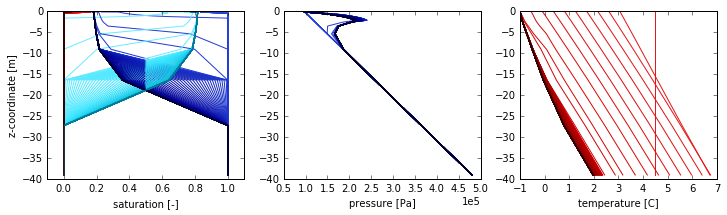

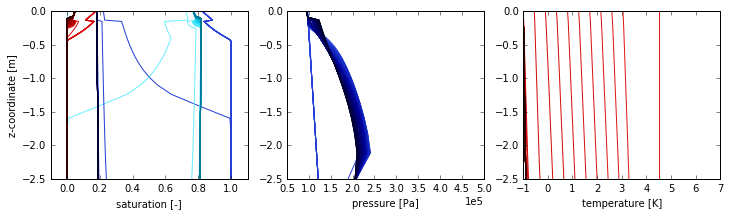

In [17]:
# plot the solution
def plot(directory, axs, style, timing):
    # load the data
    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=directory)
    keys, times, dat = parse_xmf.readATS(directory=directory)
    skeys, stimes, sdat = parse_xmf.readATS(directory=directory, base="visdump_surface_data.h5")
    
    # convert times to days
    times = [time*365.25 for time in times]

    ice = colors.cm_mapper(-1, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-1, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-1, times[-1], colors.gas_cmap())    
    
    print "mapping colorbars:", -1, times[-1]
    
    # plot saturation of liquid, pressure
    z = dati[0,0,:]
    for i,t in enumerate(times):
        if timing(t):
            axs[1].plot(dati[5,i,:],z, style, color=gas(t))
            axs[2].plot(dati[1,i,:],z, style, color=water(t))
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
    axs[1].plot(273.15*np.ones(z.shape), z, 'k--')
    axs[2].plot(101325*np.ones(z.shape), z, 'k--')
        
    # inset -- plot surface water
    pd = parse_xmf.getSurfaceData(keys, sdat, 'ponded_depth.cell.0')
    axs[3].plot(times, pd, 'b')
    if pd.max() > 0:
        axs[3].set_ylim([-.1*pd.max(), pd.max()])

    # plot snow
    snow = parse_xmf.getSurfaceData(keys, sdat, 'snow_depth.cell.0')
    snow = snow + pd
    axs[3].plot(times, snow, 'c')
    if snow.max() > 0:
        axs[3].set_ylim([-.1*snow.max(), snow.max()])
        
    # plot surface temp
    surf_T = parse_xmf.getSurfaceData(keys, sdat, "surface-temperature.cell.0")
    axs[4].plot(times, surf_T, 'r')
    
    # plot snow temp
    snow_T = parse_xmf.getSurfaceData(keys, sdat, 'snow_temperature.cell.0')
    snow_T[0] = np.nan # this is initially zero which screws up the plot
    axs[4].plot(times, snow_T, 'm')

    # plot air temp
    air_T = parse_xmf.getSurfaceData(keys, sdat, "air_temperature.cell.0")
    axs[4].plot(times, air_T, 'Brown')

def go(diii, timing):
    fig, axs = plt.subplots(1,4, figsize=(12,3))
    twinax = axs[3].twinx()
    axs = list(axs)

    axs.append(twinax)

    plot(diii, axs, '-', timing)

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('temperature [K]')
    axs[1].set_xlim(268.,278.)
    axs[2].set_xlabel('pressure [Pa]')
    axs[3].set_xlabel('time [d]')
    axs[3].set_ylabel('ponded (b) and snow (c) depth [m]')
    axs[4].set_ylabel('surface (r), snow (m), air (br) T [K]')
    axs[1].set_title(diii)

    plt.tight_layout()
    plt.show()
            
    
    # zoom
    fig, axs = plt.subplots(1,4, figsize=(12,3))
    twinax = axs[3].twinx()
    axs = list(axs)
    axs.append(twinax)

    plot(diii, axs, '-', timing)

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('temperature [K]')
    axs[1].set_xlim(268.,278.)
    axs[2].set_xlabel('pressure [Pa]')
    axs[3].set_xlabel('time [d]')
    axs[3].set_ylabel('ponded depth [m]')
    axs[4].set_ylabel('surface (r) and snow (m) T [K]')
    axs[1].set_title(diii)

    axs[0].set_ylim([-.5,-0])
    axs[1].set_ylim([-.5,-0])
    #axs[2].set_ylim([-2.5,-0])

    plt.tight_layout()
    plt.show()
    
    
def month(i):
    def timing(d):
        doy = d/365.0
        month = doy / 30.
        if np.floor(month) == i:
            return True
        else:
            return False
    return timing
def year(yr):
    def timing(d):
        return 365.*yr <= d < 365.*(yr+1)
    return timing
def all():
    def timing(m):
        return True
    return timing

IOError: Unable to open file (Unable to open file: name = 'test7/test7-organic.regression/visdump_mesh.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

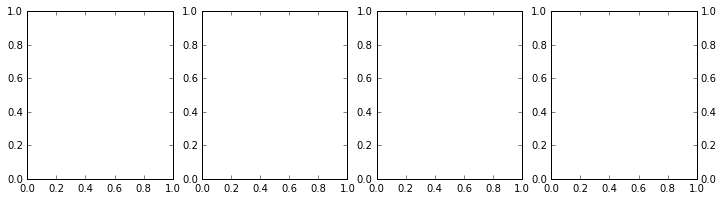

In [18]:
go("test7/test7-organic.regression", month(1))

mapping colorbars: -1 3650.0


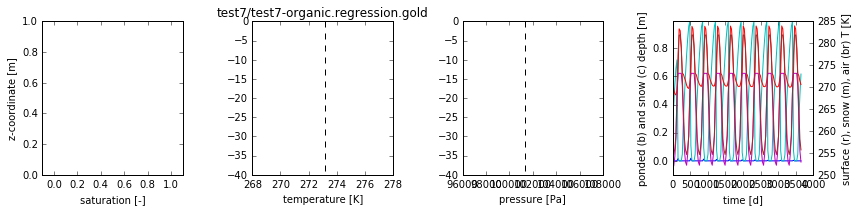

mapping colorbars: -1 3650.0


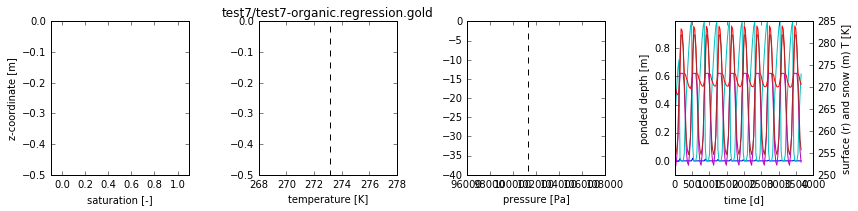

In [19]:
go("test7/test7-organic.regression.gold",month(9))

In [18]:
go("test8/test8-organic.regression.gold", year(9))

mapping colorbars: -1 3652.0
mapping colorbars: -1 3652.0
